In [9]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import colors
from classifier_25 import MyClassifier_25

%matplotlib inline

mnist_train = pd.read_csv("mnist/mnist_train.csv")

# Load the test data path
# test_dataset = pd.read_csv('mnist/mnist_test.csv')
mnist_test = pd.read_csv("mnist/mnist_test.csv")

#Take copies of the master dataframes
train = mnist_train.copy()
tester = mnist_test.copy()

# Change Classes to Test here MNIST
class1 = 1
class2 = 7

tester = tester.loc[tester['label'].isin([class1,class2])]

train_class_1 = train.loc[train['label'] == class1]
train_class_2 = train.loc[train['label'] == class2]
train = train.loc[train['label'].isin([class1,class2])]
train_rdm = train.sample(frac = 0.5)
test_rdm = train.sample(frac = 0.2)


In [13]:
my_clf = MyClassifier_25(train,class1,class2,2)
#res, performance = my_clf.test(test_rdm)

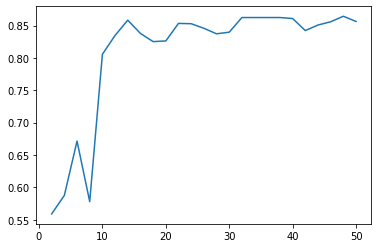

In [4]:
x,y = my_clf.plot_classifier_performance_vs_number_of_samples(tester)

In [10]:
cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

         'green': ((0.0,  0.49, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}

cmap = colors.LinearSegmentedColormap('custom', cdict)

In [17]:
def performance_vs_epsilon():
    # Testing the Algorithm performance by averaging from 10 classifiers
    epsilons= [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for eps in epsilons:
        my_clf = MyClassifier_25(train,class1,class2,2,eps)
        x,y = my_clf.plot_classifier_performance_vs_number_of_samples(tester,to_plot=False)
        plt.plot(x,y,label=eps,c=cmap(eps))
        plt.legend(title = 'epsilon values',loc="lower right")
        plt.xlabel('Number of Samples')
        plt.ylabel('Accuracy')
        plt.title('Performance Curves for different Epsilon Values')


        

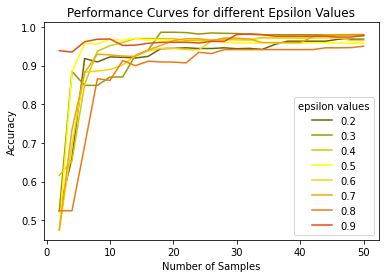

In [18]:
# epsilon greedy only for error and sv i.e not consdiereing correctly classified points at all
performance_vs_epsilon()

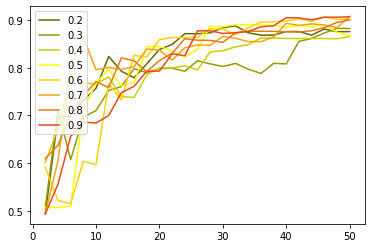

In [30]:
# same epsilon

performance_vs_epsilon()

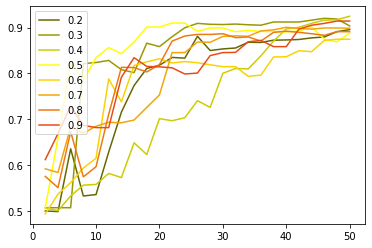

In [32]:
# inverted epsilon
performance_vs_epsilon()

In [22]:
np.linspace(0.1,0.9,10)


array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])

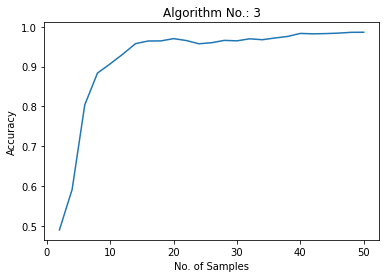

Avg: [0.49010633379565427, 0.5913546000924642, 0.8042071197411003, 0.8837725381414702, 0.9069810448451225, 0.9313915857605177, 0.9577438742487285, 0.964401294498382, 0.96458622283865, 0.9703190013869627, 0.9656033287101247, 0.9574202496532592, 0.9600554785020805, 0.9659269533055943, 0.9647711511789183, 0.9699029126213592, 0.9675913083680074, 0.971937124364309, 0.9758668515950071, 0.983402681460934, 0.9823393435043922, 0.9829865926953307, 0.9841423948220065, 0.986130374479889, 0.9863615349052243]


In [33]:
# Testing the Algorithm performance by averaging from 10 classifiers
num = 10
min_len = 100
# Outer Loop for algorithm
for i in range(3,4):
    # Inner Loop for averaging accuracy performance
    avg = None
    for j in range (num):
        my_clf = MyClassifier_25(train,1,7,i)
        x,y = my_clf.plot_classifier_performance_vs_number_of_samples(tester,False)
        if min_len > len(y):
            min_len = len(y)
        elif min_len <= len(y):
            y = y[0:min_len]
            
        if avg is None:
            avg = y
        else:
            avg = np.add(np.array(avg[0:min_len]),np.array(y)).tolist()
    avg = (np.array(avg) / num).tolist()
    if min_len > len(avg):
        min_len = len(avg)
    elif min_len <= len(avg):
        avg = avg[0:min_len]
        x = range(my_clf.batch_size,(min_len+1)*my_clf.batch_size,my_clf.batch_size)
    plt.plot(x,avg)
    plt.title("Algorithm No.: %i"%i)
    plt.xlabel("No. of Samples")
    plt.ylabel("Accuracy")
    plt.show()
    print("Avg:",avg)

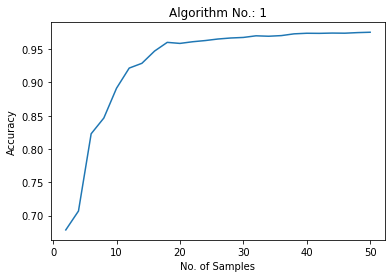

Avg: [0.6784558483587609, 0.7068423485899216, 0.8229311141932503, 0.8466019417475728, 0.8913546000924641, 0.9216366158113731, 0.9288025889967637, 0.9472029588534443, 0.9602866389274156, 0.9587147480351363, 0.9612112806287563, 0.9630143319463709, 0.9653259361997225, 0.9668515950069347, 0.9676837725381414, 0.9701340730466944, 0.9694868238557559, 0.9704576976421638, 0.9730929264909847, 0.9739713361072585, 0.9738326398520574, 0.9742487286176609, 0.9740638002773926, 0.9749422098936662, 0.9754969949144707]


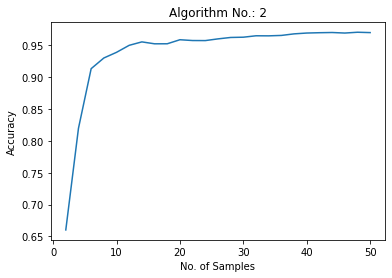

Avg: [0.6602866389274157, 0.8196024040684236, 0.9130374479889044, 0.9297734627831714, 0.9386500231160424, 0.9496532593619973, 0.9550161812297734, 0.952011095700416, 0.9520573277854829, 0.9583911234396669, 0.957142857142857, 0.9570503929727231, 0.9597318539066112, 0.961950993989829, 0.9623670827554325, 0.96458622283865, 0.9644937586685159, 0.9651410078594547, 0.9675913083680076, 0.9688858067498846, 0.9693943596856218, 0.9697179842810911, 0.9688858067498843, 0.9701340730466944, 0.96957928802589]


In [34]:
# Testing the Algorithm performance by averaging from 10 classifiers
num = 10
min_len = 100
# Outer Loop for algorithm
for i in range(1,3):
    # Inner Loop for averaging accuracy performance
    avg = None
    for j in range (num):
        my_clf = MyClassifier_25(train,1,7,i)
        x,y = my_clf.plot_classifier_performance_vs_number_of_samples(tester,False)
        if min_len > len(y):
            min_len = len(y)
        elif min_len <= len(y):
            y = y[0:min_len]
            
        if avg is None:
            avg = y
        else:
            avg = np.add(np.array(avg[0:min_len]),np.array(y)).tolist()
    avg = (np.array(avg) / num).tolist()
    if min_len > len(avg):
        min_len = len(avg)
    elif min_len <= len(avg):
        avg = avg[0:min_len]
        x = range(my_clf.batch_size,(min_len+1)*my_clf.batch_size,my_clf.batch_size)
    plt.plot(x,avg)
    plt.title("Algorithm No.: %i"%i)
    plt.xlabel("No. of Samples")
    plt.ylabel("Accuracy")
    plt.show()
    print("Avg:",avg)